In [26]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KernelDensity
from sklearn.manifold import TSNE
import umap

/Users/shun/Library/Caches/pypoetry/virtualenvs/papers-visualization-wtOSKkz2-py3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/shun/Library/Caches/pypoetry/virtualenvs/papers-visualization-wtOSKkz2-py3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-ji

In [2]:
data_path = Path('../papers_info')

In [15]:
# papers info を読み込む

#iclr = pd.read_pickle(data_path / 'iclr_2023.pickle.zip')
cvpr = pd.read_pickle(data_path / 'cvpr_2023.pickle.zip')

In [16]:
#papers = pd.concat([iclr, cvpr], axis=0)
papers = cvpr 

In [17]:
papers

,year,title,abstract,conference
0,2023,GFPose: Learning 3D Human Pose Prior With Grad...,Learning 3D human pose prior is essential to h...,cvpr
1,2023,CXTrack: Improving 3D Point Cloud Tracking Wit...,3D single object tracking plays an essential r...,cvpr
2,2023,Deep Frequency Filtering for Domain Generaliza...,Improving the generalization ability of Deep N...,cvpr
3,2023,Frame Flexible Network,Existing video recognition algorithms always c...,cvpr
4,2023,Unsupervised Cumulative Domain Adaptation for ...,Optical flow has achieved great success under ...,cvpr
...,...,...,...,...
2354,2023,CIMI4D: A Large Multimodal Climbing Motion Dat...,Motion capture is a long-standing research pro...,cvpr
2355,2023,Fantastic Breaks: A Dataset of Paired 3D Scans...,Automated shape repair approaches currently la...,cvpr
2356,2023,Modernizing Old Photos Using Multiple Referenc...,This paper firstly presents old photo moderniz...,cvpr
2357,2023,Interactive Cartoonization With Controllable P...,Cartoonization is a task that renders natural ...,cvpr


In [20]:
### titleからキーワードを抽出
keywords = []
words, counts = np.unique(' '.join(papers.title).lower().split(), return_counts=True)
ind = np.argsort(counts)[::-1][:50]
for i in ind:
    if len(words[i]) >= 5: 
        print(f'{words[i]:20} {counts[i]:4}')
        keywords.append(words[i])

learning              445
image                 261
neural                185
detection             185
object                176
segmentation          164
video                 161
semantic              120
models                104
visual                102
estimation             97
diffusion              93
generation             93
representation         90
point                  89
transformer            88
reconstruction         86
efficient              84
network                78
model                  77
recognition            77
human                  76
domain                 76
towards                76
using                  73
scene                  70
fields                 68
self-supervised        67
vision                 62
contrastive            59
masked                 59
cloud                  59
synthesis              59
radiance               59
unsupervised           58


In [21]:
# 不要そうなキーワードを削除
if "learning" in keywords:keywords.remove('learning')
if "image" in keywords:keywords.remove('image')
if "neural" in keywords:keywords.remove('neural')
if "models" in keywords:keywords.remove('models')
if "network" in keywords:keywords.remove('network')
if "model" in keywords:keywords.remove('model')

In [22]:
keywords = np.array(keywords)

# glasbey.create_palette(palette_size=32)
labelColors = ['#d21820', '#1869ff', '#008a00', '#f36dff', '#710079', '#aafb00', 
               '#00bec2', '#ffa235', '#5d3d04', '#08008a', '#005d5d', '#9a7d82', 
               '#a2aeff', '#96b675', '#9e28ff', '#4d0014', '#ffaebe', '#ce0092', 
               '#00ffb6', '#002d00', '#9e7500', '#3d3541', '#f3eb92', '#65618a', 
               '#8a3d4d', '#5904ba', '#558a71', '#b2bec2', '#ff5d82', '#1cc600', 
               '#92f7ff', '#2d86a6']
labelColors = np.array(labelColors)

counts = [np.sum([keyword in t.lower() for t in papers.title]) for keyword in keywords]
ind = np.argsort(counts)[::-1][:30]
for i in ind:
    print(f'{keywords[i]:20} {counts[i]:4}')
    
print('')
print(f'{keywords.size} labels')


object                234
video                 212
detection             186
segmentation          171
transformer           151
semantic              138
vision                131
visual                129
representation        128
point                 127
efficient             104
diffusion             100
generation             97
scene                  97
estimation             96
human                  95
domain                 93
reconstruction         88
cloud                  84
recognition            82
using                  77
towards                76
fields                 70
self-supervised        67
radiance               62
contrastive            61
synthesis              60
masked                 58
unsupervised           58

29 labels


In [23]:
# color map
n = 10
color = plt.cycler("color", plt.get_cmap("jet")(np.linspace(0,1,n))) # "jet" "gist_rainbow" "gist_ncar"

In [40]:
# embedding
titles_abstracts_together = [papers.title[i] + ' ' + papers.abstract[i] for i in range(len(papers))]

vectorizer = TfidfVectorizer(sublinear_tf=True)
tfidf_features = vectorizer.fit_transform(titles_abstracts_together)

# papers_embed = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine').fit_transform(tfidf_features)
papers_embed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(tfidf_features)

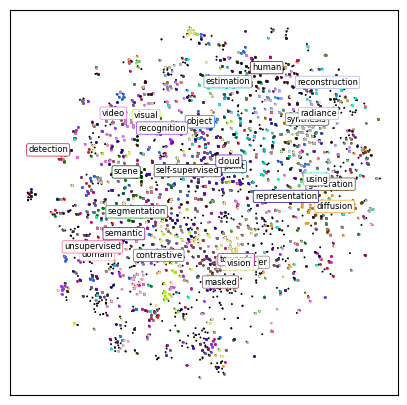

In [41]:
# visualize
fig,ax = plt.subplots(figsize=(5,5))

ax.scatter(papers_embed[:,0],papers_embed[:,1],s=2,c="k",ec="none")
ax.set_xticks([])
ax.set_yticks([])

for num, keyword in enumerate(keywords):
    idx = [i for i,t in enumerate(papers.title) if keyword.lower() in t.lower()]
    ax.scatter(papers_embed[idx,0], papers_embed[idx,1], s=1, c=labelColors[num])

for num, keyword in enumerate(keywords):
    idx = [keyword.lower() in t.lower() for t in papers.title]
    if np.sum(idx) > 500:
        bw = 10
    else:
        bw = 2    
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(papers_embed[idx])
    log_density = kde.score_samples(papers_embed[idx])
    mode = papers_embed[idx][np.argmax(log_density)]
    mode += mode / np.linalg.norm(mode) * 5
    if keyword == 'translation':
        mode[0] += 5
    if mode[0] > 65:
        mode[0] -= 5
    ax.text(mode[0], mode[1], keyword, ha='center', va='center', c='k', fontsize=6,
                bbox=dict(facecolor='w', alpha=1, edgecolor=labelColors[num], 
                          boxstyle='round, pad=.2', linewidth=.5))